# **Importing Libraries**

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import math

# **Reading Image**

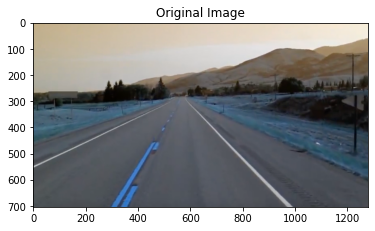

In [ ]:
original_img  = cv2.imread("/content/testHough.jpg")
plt.imshow(original_img)
plt.title('Original Image') 
plt.show()

# **Converting BGR to RGB**

(704, 1279, 3)


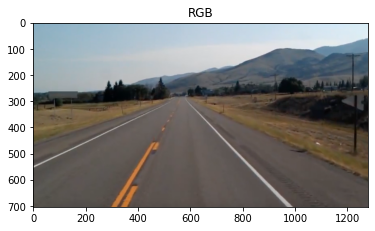

In [ ]:
b,g,r = cv2.split(original_img)       
RGB_img = cv2.merge([r,g,b])     
plt.imshow(RGB_img)
plt.title('RGB')
print(RGB_img.shape)

# **Smoothing the image**

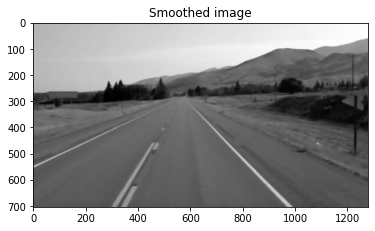

In [ ]:
gray_img=cv2.cvtColor(RGB_img,cv2.COLOR_RGB2GRAY);
smoothed_img = cv2.medianBlur(gray_img,7)
plt.imshow(smoothed_img,cmap="gray")
plt.title('Smoothed image') 
plt.show()

# **Edge Detection**

Text(0.5, 1.0, 'Edge Image')

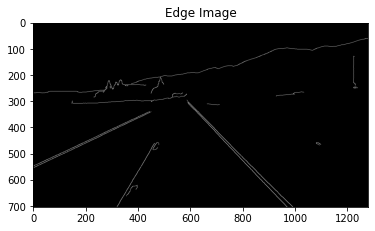

In [ ]:
filtered_img = cv2.Canny(smoothed_img,50,200)
plt.imshow(filtered_img,cmap="gray")
plt.title('Edge Image')

# **Region of interest**

In [ ]:
def ROI(Image):
  height = Image.shape[0]
  width = Image.shape[1]
  polygons = np.array([ [(0, height), (round(0/2), round(height/2)), (30000,height)] ]) 
  mask = np.zeros_like(Image)
  cv2.fillPoly(mask, polygons, 255)
  masked_image = cv2.bitwise_and(Image, mask)
  return masked_image

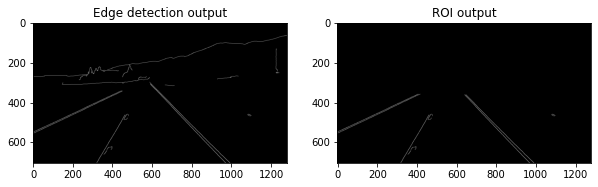

In [ ]:
masked_image=ROI(filtered_img)
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(filtered_img,cmap="gray")
plt.title("Edge detection output")
fig.add_subplot(1, 2, 2)
plt.imshow(masked_image,cmap="gray")
plt.title("ROI output")
plt.show()

# **Accumulation into (ρ, θ)-space using Hough transform**

In [ ]:
  thetas = np.deg2rad(np.arange(0,180))
  width, height = masked_image.shape
  diag_len = int(np.ceil(np.sqrt(width * width + height * height)))

  cos_t = np.cos(thetas)
  sin_t = np.sin(thetas)
  num_thetas = len(thetas)

  accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint64)

  rhos = []
  theta = []

  line_image = np.copy(original_img) * 0


In [ ]:
def Accumulator(Image):
  y_idxs, x_idxs = np.nonzero(Image)

  for i in range(len(x_idxs)):
      x = x_idxs[i]
      y = y_idxs[i]
      for k in range(num_thetas):
          rho = round(x * cos_t[k] + y * sin_t[k])
          accumulator[rho, k] += 1
  return accumulator

In [ ]:
def Thresholding(Image):
  y_idxs, x_idxs = np.nonzero(Image)
  Accumulator(masked_image)

  for i in range(len(x_idxs)):
    x = x_idxs[i]
    y = y_idxs[i]
    for k in range(num_thetas):
      rho = round(x * cos_t[k] + y * sin_t[k])
      if (accumulator[rho, k] > 200):
          try:
            rhos.append(rho)
            theta.append(k)
          except TypeError:
            slope, intercept = 0,0 
  return rhos,theta

In [ ]:
def DrawingLines():
  #line_image = np.copy(original_img) * 0
  Thresholding(masked_image)
  for i in range(len(theta)):
    a = np.cos(np.deg2rad(theta[i]))
    b = np.sin(np.deg2rad(theta[i]))
    x0 = a*rhos[i]
    y0 = b*rhos[i]
    x1 = int(x0 + 2000*(-b))
    y1 = int(y0 + 2000*(a))
    x2 = int(x0 - 2000*(-b))
    y2 = int(y0 - 2000*(a))
    cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),4)
  return(line_image)

In [ ]:
DrawingLines()

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

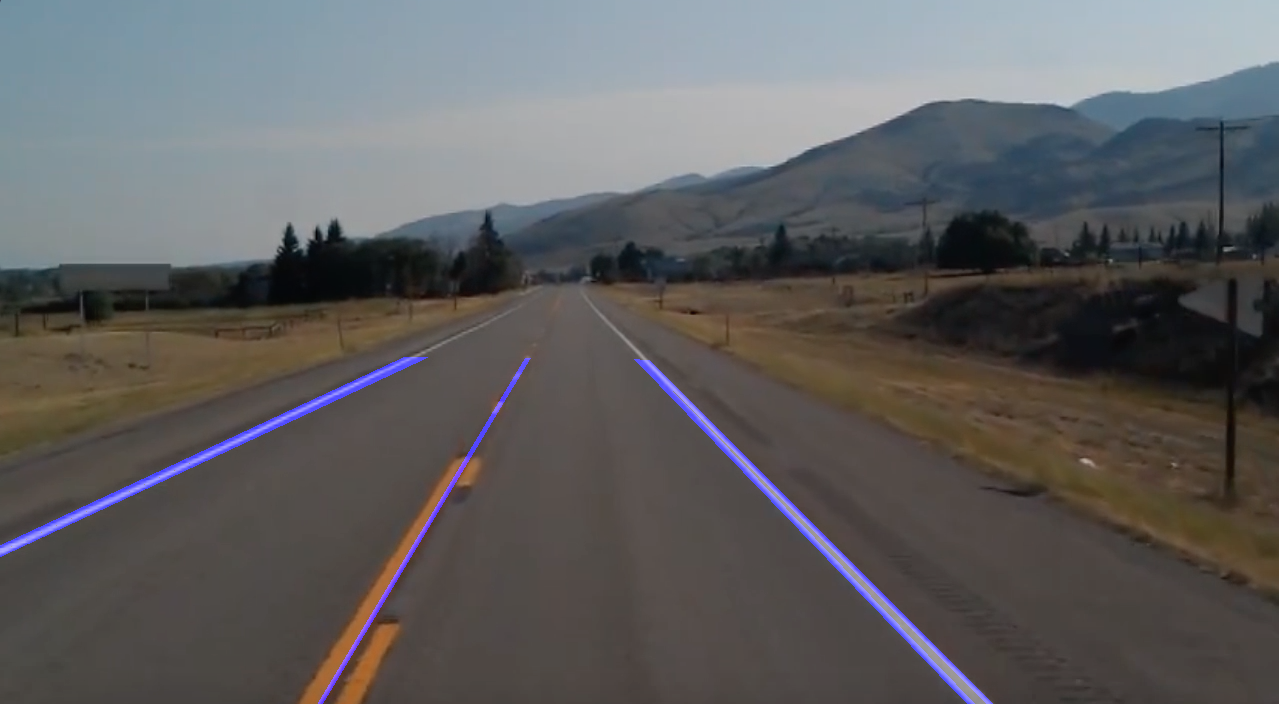

In [ ]:
new=ROI(line_image)
lines_edges = cv2.addWeighted(original_img, 0.8, new, 1, 5)
cv2_imshow(lines_edges)